In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,TicketPrefix,FamilyType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,1,A,Small Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,1,P,Small Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,0,S,Solo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,1,1,Small Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False,0,3,Solo


In [20]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,FamilySize,TicketPrefix,FamilyType
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,False,0,2,Solo
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,True,0,1,Solo
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,False,3,W,Large Family
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,True,0,1,Solo
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,False,0,3,Solo


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      891 non-null    object 
 12  HasCabin      891 non-null    bool   
 13  FamilySize    891 non-null    int64  
 14  TicketPrefix  891 non-null    object 
 15  FamilyType    891 non-null    object 
dtypes: bool(1), float64(2), int64(6), object(7)
memory usage: 105.4+ KB


In [19]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          0
HasCabin          0
FamilySize        0
TicketPrefix      0
FamilyType        0
dtype: int64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [6]:
#Survival Rate by Passenger Class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class) 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [7]:
#Gender Bias in Survival
gender_survival = df.groupby('Sex')['Survived'].mean()
overall_survival = df['Survived'].mean()

print(gender_survival)
print("Overall Survival Rate:", overall_survival)

#Females survived at a much higher rate Women and children first.

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Overall Survival Rate: 0.3838383838383838


In [8]:
#Missing Cabin Class Analysis
df['HasCabin'] = df['Cabin'].notna()

cabin_survival = df.groupby('HasCabin')['Survived'].mean()
cabin_counts = df.groupby('HasCabin')['Survived'].count()

print(cabin_survival)
print(cabin_counts)

HasCabin
False    0.299854
True     0.666667
Name: Survived, dtype: float64
HasCabin
False    687
True     204
Name: Survived, dtype: int64


            FamilySize  Survived
FamilySize    1.000000  0.016639
Survived      0.016639  1.000000


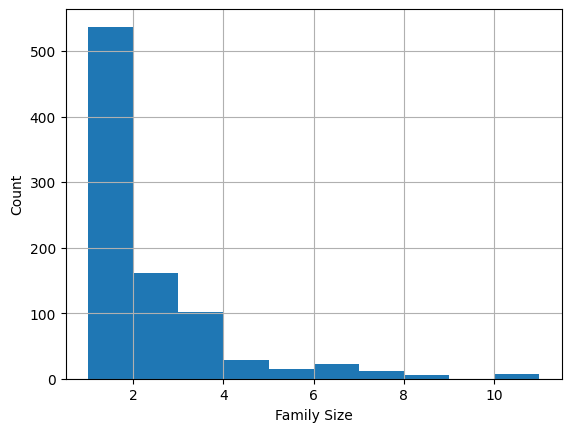

In [9]:
#Family Size Impact
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

print(df[['FamilySize', 'Survived']].corr())

df['FamilySize'].hist(bins=10)
plt.xlabel("Family Size")
plt.ylabel("Count")
plt.show()

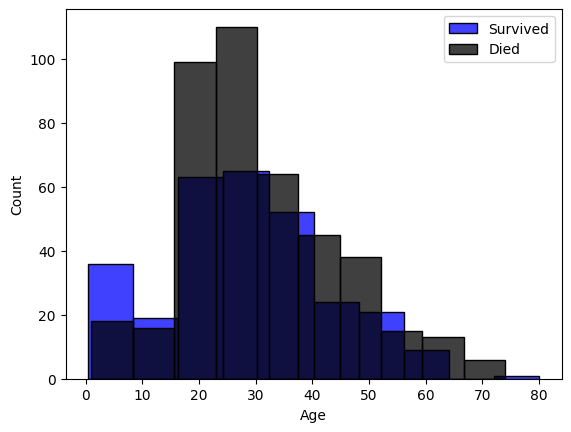

In [30]:
#Age Distribution: Survivors vs Non-Survivors
sns.histplot(df[df["Survived"] == 1]["Age"], bins=10, color="blue", label="Survived")
sns.histplot(df[df["Survived"] == 0]["Age"], bins=10, color="black", label="Died")
plt.legend()
plt.xlabel("Age")
plt.show()

In [11]:
#Embarkation Port Analysis
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

embark_survival = df.groupby('Embarked')['Survived'].mean()
print(embark_survival)

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [33]:
#Ticket Class vs Survival
df['TicketPrefix'] = df['Ticket'].str[0]

ticket_survival = df.groupby('TicketPrefix')['Survived'].mean()

ticket_survival.sort_values(ascending=False)

TicketPrefix
9    1.000000
P    0.646154
1    0.630137
F    0.571429
2    0.464481
C    0.340426
S    0.323077
L    0.250000
3    0.239203
4    0.200000
6    0.166667
W    0.153846
7    0.111111
A    0.068966
8    0.000000
5    0.000000
Name: Survived, dtype: float64

In [36]:
#Missing Fare Handling
print("Missing Fare values:", df['Fare'].isnull().sum())
print(df.groupby("Pclass")["Fare"].median())

Missing Fare values: 0
Pclass
1    60.2875
2    14.2500
3     8.0500
Name: Fare, dtype: float64


               Age      Fare  Survived
Age       1.000000  0.096067 -0.077221
Fare      0.096067  1.000000  0.257307
Survived -0.077221  0.257307  1.000000


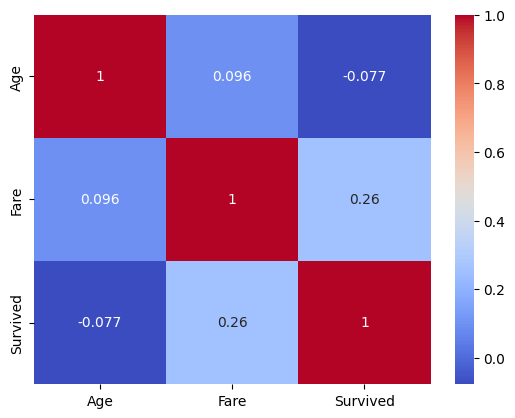

In [35]:
#Correlation Matrix Analysis
corr = df[['Age', 'Fare', 'Survived']].corr()
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [16]:
#Advanced Feature Engineering (Family Survival)
df['FamilySize'] = df['SibSp'] + df['Parch']

df['FamilyType'] = df['FamilySize'].apply(
    lambda x: 'Solo' if x == 0 else 'Small Family' if x == 1 else 'Large Family'
)

family_survival = df.groupby('FamilyType')['Survived'].mean()
print(family_survival)

FamilyType
Large Family    0.466321
Small Family    0.552795
Solo            0.303538
Name: Survived, dtype: float64
